In [92]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker 
import matplotlib.pyplot as plt
from pathlib import Path


In [93]:
api_key = contents = Path("YT_API_KEY.txt").read_text()
channel_handles = ['@alextheanalyst', # Alex The Analyst
                   '@techTFQ', # techTFQ
                   '@LukeBarousse', # Luke Barousse
                   '@KenJee_ds', # Ken Jee
                   '@TinaHuang1' #Tina Huang
                ]

api_service_name = 'youtube'
api_version = 'v3'

# Initialize YouTube Data API client using google api library
youtube = build(api_service_name, api_version, developerKey=api_key)

# Analyze YouTube Channels About Data Science
## Function to request channel information

In [94]:
# request channel information using youtube data api
def request_channel_info(youtube, channel_handles):
    
    all_data = []
    responses = []
    
    for handle in channel_handles:
        request = youtube.channels().list(
            part='snippet,statistics,contentDetails',
            forHandle=handle
            )
        
        response = request.execute()
        responses.append(response)
        
        
    for response in responses:  
        response_data = response['items'][0]
        data = {'Channel_name': response_data['snippet']['title'],
               'Subscribers': response_data['statistics']['subscriberCount'],
               'Views': response_data['statistics']['viewCount'],
               'Total_videos': response_data['statistics']['videoCount'],
               'Playlist_ID': response_data['contentDetails']['relatedPlaylists']['uploads']
               }
       
        all_data.append(data)        
        
        
    #return response
    return all_data

In [95]:
channel_statistics = request_channel_info(youtube, channel_handles)

In [96]:
channel_statistics

[{'Channel_name': 'Alex The Analyst',
  'Subscribers': '1010000',
  'Views': '47346746',
  'Total_videos': '352',
  'Playlist_ID': 'UU7cs8q-gJRlGwj4A8OmCmXg'},
 {'Channel_name': 'techTFQ',
  'Subscribers': '361000',
  'Views': '20612871',
  'Total_videos': '139',
  'Playlist_ID': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'Channel_name': 'Luke Barousse',
  'Subscribers': '509000',
  'Views': '25406021',
  'Total_videos': '163',
  'Playlist_ID': 'UULLw7jmFsvfIVaUFsLs8mlQ'},
 {'Channel_name': 'Ken Jee',
  'Subscribers': '267000',
  'Views': '9358715',
  'Total_videos': '288',
  'Playlist_ID': 'UUiT9RITQ9PW6BhXK0y2jaeg'},
 {'Channel_name': 'Tina Huang',
  'Subscribers': '804000',
  'Views': '36433517',
  'Total_videos': '245',
  'Playlist_ID': 'UU2UXDak6o7rBm23k3Vv5dww'}]

In [97]:
# chonvert channel data to panda DataFrame
channel_data = pd.DataFrame(channel_statistics)

In [98]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_ID
0,Alex The Analyst,1010000,47346746,352,UU7cs8q-gJRlGwj4A8OmCmXg
1,techTFQ,361000,20612871,139,UUnz-ZXXER4jOvuED5trXfEA
2,Luke Barousse,509000,25406021,163,UULLw7jmFsvfIVaUFsLs8mlQ
3,Ken Jee,267000,9358715,288,UUiT9RITQ9PW6BhXK0y2jaeg
4,Tina Huang,804000,36433517,245,UU2UXDak6o7rBm23k3Vv5dww


In [99]:
channel_data[['Subscribers','Views','Total_videos']] = channel_data[['Subscribers','Views','Total_videos']].apply(pd.to_numeric)

In [100]:
channel_data = channel_data.sort_values(by='Subscribers', ascending=True)

## Plot the statistic results

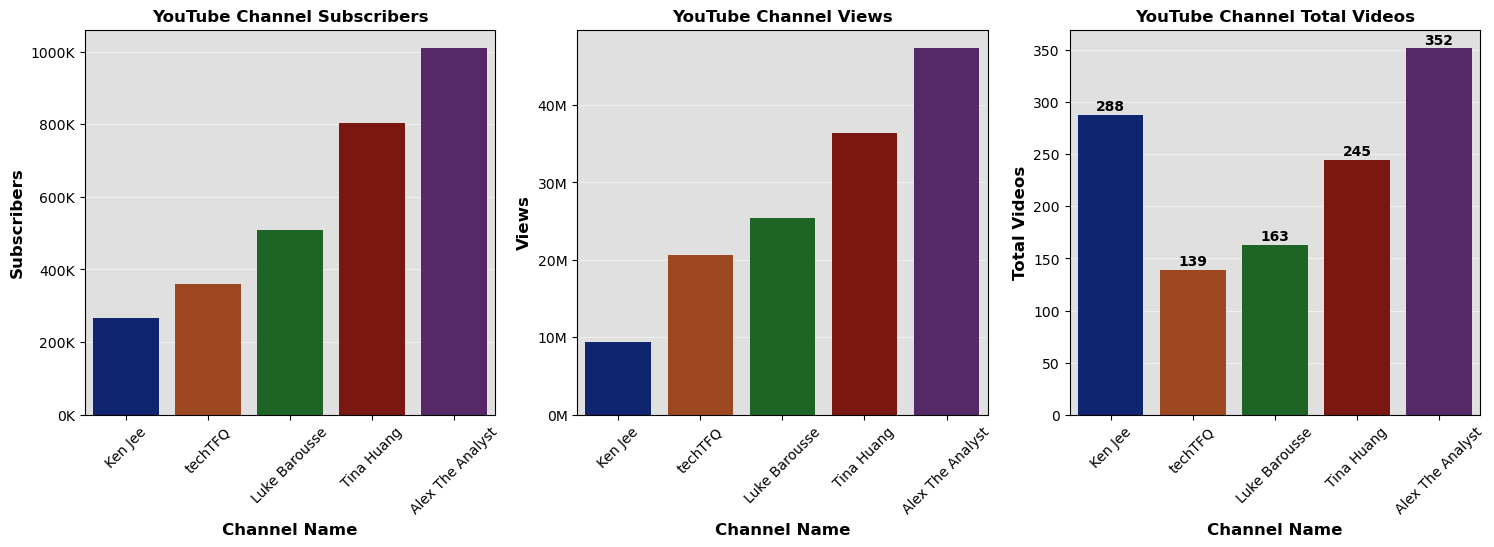

In [118]:
plt.figure(figsize=(18,5))

# plot subscriber statistics
ax=plt.subplot(1,3,1)
ax.set_facecolor('#e0e0e0')
ax.grid(True,axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Subscribers', hue='Channel_name', data=channel_data, 
            palette='dark', legend = False, ax=ax, zorder = 2)
ax.set_xlabel('Channel Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Subscribers', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10, rotation=45)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('YouTube Channel Subscribers', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e3)}K'))



# plot views statistics
ax=plt.subplot(1,3,2)
ax.set_facecolor('#e0e0e0')
ax.grid(True, axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Views', hue='Channel_name', data=channel_data, 
            palette='dark', legend=False, ax=ax, zorder=2)
ax.set_xlabel('Channel Name',fontsize=12, fontweight='bold')
ax.set_ylabel('Views',fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10,rotation=45)
ax.tick_params(axis='y',labelsize=10)
ax.set_title('YouTube Channel Views',fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))



# plot video counts statistics
ax = plt.subplot(1,3,3)
ax = sns.barplot(x='Channel_name', y='Total_videos', hue='Channel_name', data=channel_data, 
            palette='dark', legend=False, ax=ax, zorder=2)
ax.set_facecolor('#e0e0e0')
ax.grid(True, axis='y', linestyle='-', color='white', alpha=0.5)
ax.set_xlabel('Channel Name',fontsize=12, fontweight='bold')
ax.set_ylabel('Total Videos',fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10,rotation=45)
ax.tick_params(axis='y',labelsize=10)
ax.set_title('YouTube Channel Total Videos',fontsize=12, fontweight='bold')

for i, value in enumerate(channel_data['Total_videos']):
    plt.text(i, value+1, str(value), ha='center', va='bottom',fontsize=10, fontweight='bold')

# Analyze A Specific Channel

## Funtion to get video IDs

In [102]:
def get_playlist_videos(youtube, Playlist_ID): 
    
    video_ids = []
    next_page_token = None   
    
    while True: 
        request = youtube.playlistItems().list(
            part='snippet,contentDetails',
            maxResults=50,
            pageToken=next_page_token,
            playlistId=Playlist_ID)
        response = request.execute()
        #return response
    
        for item in response['items']:
           video_id = item['contentDetails']['videoId']
           #title = item['snippet']['title']       
           video_ids.append(video_id)
        
        next_page_token=response.get('nextPageToken')
        #print(next_page_token)
        if not next_page_token:
            break    
           
    return video_ids
   
   

In [103]:
playlist_ID = channel_data.loc[channel_data['Channel_name']=='Alex The Analyst','Playlist_ID'].iloc[0]

In [104]:
video_ids = get_playlist_videos(youtube, playlist_ID)

## Function to get video details

In [105]:
def get_video_block_details(youtube, video_id):
    """
    get video details with maximal 50 video IDs
    """
    
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        id=','.join(video_id)
    )
    response = request.execute()
    
    return response


In [106]:
def get_all_video_details(youtube,video_id):
    """
    get details of all videos
    """
    
    video_details = []
    video_len=len(video_id)
    
    for i in range(0,video_len,50):
        video_id_block=video_id[i:i+50]        
        video_details.append(get_video_block_details(youtube, video_id_block))   

    return video_details   
        

In [107]:
get_all_video_details(youtube,video_ids)

[{'kind': 'youtube#videoListResponse',
  'etag': 'VZI4gQnnLoKisGiWLp_LecBWCnk',
  'items': [{'kind': 'youtube#video',
    'etag': 'L9JIKHLpsGy1qwktbhE1whjavOg',
    'id': 'hgp91KvbJV4',
    'snippet': {'publishedAt': '2025-03-18T12:01:07Z',
     'channelId': 'UC7cs8q-gJRlGwj4A8OmCmXg',
     'title': 'How to Lie with Data | Misleading Graphs',
     'description': "It's so easy to lie with data!\n\nIn fact, it happens all the time, but we just may not realize it (cough cough *all news networks*)\n\nIn this series I show you some of the most common ways to lie with data!\n\n____________________________________________ \n\nRESOURCES:\n\n💻Analyst Builder - https://www.analystbuilder.com/\n\n📖Take my Full MySQL Course Here: https://bit.ly/3tqOipr\n📖Take my Full Python Course Here: https://bit.ly/48O581R\n📖Practice Technical Interview Questions: https://bit.ly/46pDqqL\n\nCoursera Courses:\nGoogle Data Analyst Certification: https://coursera.pxf.io/5bBd62\nData Analysis with Python - https://c

## Function to get video statistics

In [108]:
def get_video_stats(youtube,video_id):
    """
    get the statistics of provided videos
    """
    
    all_video_stats = []
    video_details = get_all_video_details(youtube,video_id)
    
    for details in video_details:
        for i in range(len(details['items'])):
            detail_data = details['items'][i]
            stats_data = {'Video_Title': detail_data['snippet']['title'],
                          'View_Count': detail_data['statistics']['viewCount'],
                          'Like_Count': detail_data['statistics']['likeCount'],                      
                          'Comment_Count': detail_data['statistics']['commentCount']            
                        }
            all_video_stats.append(stats_data)
        
    return all_video_stats
        

In [109]:
all_video_stats = get_video_stats(youtube,video_ids)
# print(all_video_stats)

In [110]:
video_ids

['hgp91KvbJV4',
 '1ql4kNv0_qY',
 'r5512UY3MTc',
 'XuOcmjIbFGg',
 'Ka2mDrKEAhg',
 'k8nBWL6K884',
 'WpX2F2BS3Qc',
 'cd_jj0IRmaA',
 'OcG0B4ny1cE',
 'hXpt8zj_ajc',
 'ItZlTixh6Bs',
 'PEWMgtu-1e4',
 'hCmEfxy-BXg',
 'TtCBz1lutsY',
 'Ihmq-qeA5Pc',
 'wQQR60KtnFY',
 'oHte3qFa-oY',
 'P7p2OZj9ewU',
 'I0vQ_VLZTWg',
 'tnz72ywhCoo',
 'j8FSP8XuFyk',
 'zXnQNytHCPM',
 'osA1QpBcxRs',
 'Mdq1WWSdUtw',
 'CZt2BUpgjgw',
 't1fQBD4B7xk',
 'OT1RErkfLNQ',
 'rxyLC247h6E',
 'AycpRKyRagE',
 'K2GfrERtliU',
 'xmVyaT-RuVo',
 'amb9bciHGSI',
 'hgaVi4sOHkM',
 'YSjbGET6R1A',
 'vDVcXXfc9e8',
 'Vg6ys_JvXzg',
 'sge9qTf8GdY',
 '9ur0OpMADuM',
 'UTMuL_86gSQ',
 'sEImMaovc1Q',
 'ZYps6TmBkWk',
 'zv1nfZTYpio',
 'rn0dSsYXhIE',
 'siHou7lObbo',
 'wJiJXD7MVoY',
 'BzwAZ1k3WEY',
 '5q2u8__sVhs',
 'UJbNEH0_nGY',
 'oz2K4HUNMW4',
 'Y-4ri9QjsTI',
 'F5v2dRYU5IA',
 '_R6K1aNtKpE',
 '5tKmTdvEAVk',
 'QYd-RtK58VQ',
 'c5ko0sedE7k',
 '4UltKCnnnTA',
 'BV5ckMNNvi4',
 'QMUZ5HfWMRc',
 '7b8ViCqD9JM',
 '7vnxpcqmqNQ',
 'uEk07jXdKOo',
 'UC7uvOqcUTs',
 '1KEbiq

In [111]:
video_data = pd.DataFrame(all_video_stats)
#print(video_data)

In [112]:
video_data[['View_Count','Like_Count','Comment_Count']] = video_data[['View_Count','Like_Count','Comment_Count']].apply(pd.to_numeric)

In [113]:
top10_videos = video_data.sort_values(by='View_Count', ascending=False)[:10]

In [114]:
top10_videos

,Video_Title,View_Count,Like_Count,Comment_Count
257,Data Analyst Portfolio Project | SQL Data Expl...,2112285,36219,4327
160,FREE Data Analyst Bootcamp!!,1858686,45728,1737
340,SQL Basics Tutorial For Beginners | Installing...,1459173,18585,2058
161,How to Become a Data Analyst in 2023 (Complete...,1306098,43278,1301
317,What Does a Data Analyst Actually Do?,1016414,19659,501
217,Full Project in Excel | Excel Tutorials for Be...,961989,20180,1146
315,Top 5 Reasons Not to Become a Data Analyst,926433,19758,1050
231,Pivot Tables in Excel | Excel Tutorials for Be...,900989,18100,441
93,Installing MySQL and Creating Databases | MySQ...,887286,11622,1228
211,Database vs Data Warehouse vs Data Lake | What...,885646,22972,336


## Plot the statistics results

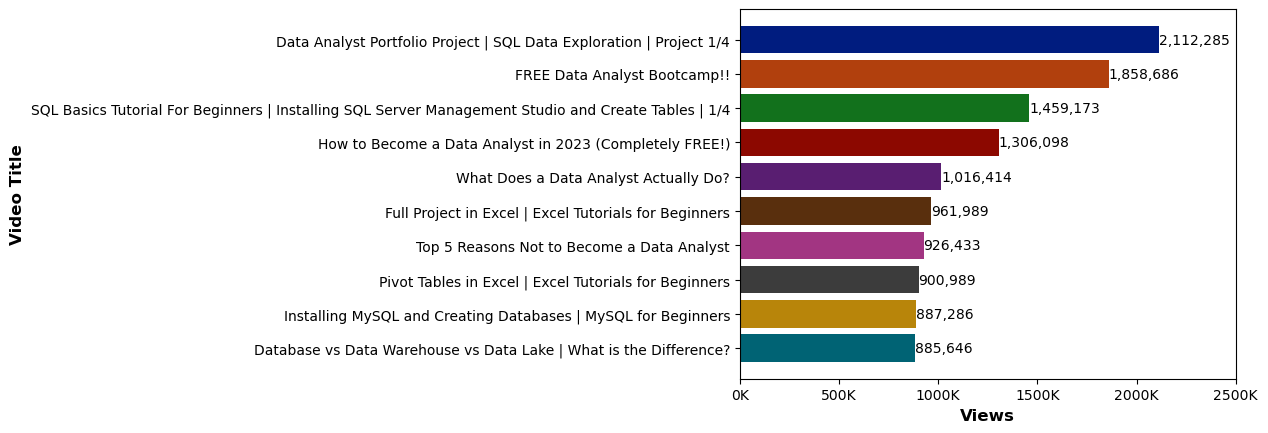

In [115]:
ax=plt.subplot()
colors = sns.color_palette("dark", len(top10_videos))
bars = ax.barh(top10_videos['Video_Title'], top10_videos['View_Count'],color=colors)
ax.invert_yaxis()
ax.bar_label(bars, fmt=lambda x: "{:,.0f}".format(x))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e3)}K'))
ax.set_xlim(right=2500000)
ax.set_xlabel('Views',fontsize=12, fontweight='bold')
ax.set_ylabel('Video Title',fontsize=12, fontweight='bold')
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)


In [116]:
video_data.to_csv('video_data.csv')